## Short Minimum distance test

Note: this only cares about the x and y coords. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate_sensor_positions_min_distance(n_sensors, min_distance, iDim, jDim, grid_resolution=0.5, max_attempts=100):
    """
    Generate random sensor positions within specified dimensions with a minimum distance constraint,
    adjusted by a grid resolution factor. Includes an iteration limit to prevent infinite loops.

    Parameters:
    - n_sensors (int): Number of sensor positions to generate.
    - min_distance (float): Minimum distance between any two sensors.
    - iDim (float): Maximum value for the i-coordinate (x-axis).
    - jDim (float): Maximum value for the j-coordinate (y-axis).
    - grid_resolution (float, optional): Factor to adjust the minimum distance. Default is 0.5.
    - max_attempts (int, optional): Maximum number of attempts to place a sensor before giving up. Default is 100.

    Returns:
    - i_sensor (np.ndarray): Array of i-coordinates of the generated sensors.
    - j_sensor (np.ndarray): Array of j-coordinates of the generated sensors.
    """
    
    sensors = []  # List to store the (i, j) coordinates of sensors.
    i_sensor = []  # List to store i-coordinates (x-axis).
    j_sensor = []  # List to store j-coordinates (y-axis).
    
    attempts = 0  # Counter for attempts to place a sensor.
    
    while len(sensors) < n_sensors and attempts < max_attempts:
        new_point = (np.random.uniform(0, iDim), np.random.uniform(0, jDim))
        adjusted_min_distance = min_distance / grid_resolution
        
        if all(np.linalg.norm(np.array(new_point) - np.array(existing_point)) >= adjusted_min_distance for existing_point in sensors):
            sensors.append(new_point)
            i_sensor.append(new_point[0])
            j_sensor.append(new_point[1])
        attempts += 1
        
    if len(sensors) < n_sensors:
        print(f"Warning: Only {len(sensors)} sensors placed out of {n_sensors} requested.")
    
    i_sensor = np.array(i_sensor)
    j_sensor = np.array(j_sensor)
    
    return i_sensor, j_sensor


## Standard way

In [3]:
n_sensors = 35

In [4]:
i_sensor = np.random.randint(low=0, high=100, size=n_sensors)
j_sensor = np.random.randint(low=0, high=100, size=n_sensors)

## Minimum Distance

In [5]:
i_sensor_min, j_sensor_min = generate_sensor_positions_min_distance(n_sensors, min_distance=10, iDim=100, jDim=100, grid_resolution=1)

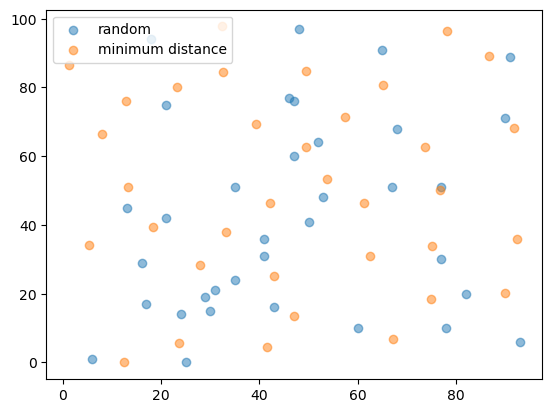

In [6]:
plt.scatter(i_sensor, j_sensor, alpha=0.5, label='random')
plt.scatter(i_sensor_min, j_sensor_min, alpha=0.5, label='minimum distance')
plt.legend()

If you try to do too many sensors:

In [7]:
i_sensor_min, j_sensor_min = generate_sensor_positions_min_distance(n_sensors=100, min_distance=10, iDim=100, jDim=100, grid_resolution=1)